## Base Model Result:

In this notebook we will delete unique values columns as data preprocesing and will simply run Naive Bayse model to build a baseline. The next work would be done to improve the base line results

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("F:/House Pricing/data/train.csv")
df_test = pd.read_csv("F:/House Pricing/data/test.csv")

In [3]:
print len(df_train)
df_train.head() 

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print len(df_test)
df_test.head() 

1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
del(df_train['Id'])

In [6]:
lst_id = df_test['Id']
del(df_test['Id'])

In [7]:
import h2o
h2o.init(max_mem_size='6G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from C:\Users\hamza\Anaconda3\envs\gl-env\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\hamza\appdata\local\temp\tmphqwyb8
  JVM stdout: c:\users\hamza\appdata\local\temp\tmphqwyb8\h2o_hamza_started_from_python.out
  JVM stderr: c:\users\hamza\appdata\local\temp\tmphqwyb8\h2o_hamza_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,1 month and 14 days
H2O cluster name:,H2O_from_python_hamza_vfpxmu
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [8]:
response = 'SalePrice'

# upload data to h2o frame
hdf= h2o.H2OFrame(df_train)

# factor the class label
# hdf[response]= hdf[response].asfactor()

# create train and validation datasets for model learining with 70 and 30 percent ratio
hdf_train, hdf_validate = hdf.split_frame(ratios=[0.70], seed=10)


# create input and response column names

input_name= hdf_train.col_names
input_name.remove(response)
print input_name

Parse progress: |█████████████████████████████████████████████████████████| 100%
[u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',

In [9]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [ ]:
my_glm = H2OGeneralizedLinearEstimator(seed = 1,
                                       solver  = 'IRLSM ',
                                       family = 'gaussian'
#                                        missing_values_handling = 'MeanImputation'
                                      )
my_glm.train(x = input_name, y=response , training_frame= hdf_train, validation_frame= hdf_validate)

In [ ]:
print 'train root mean square log error: ', my_glm.rmsle(train=True)
print 'train root mean square log error: ', my_glm.rmsle(valid=True)

In [10]:
my_dl = H2ODeepLearningEstimator(seed =1
                                )
my_dl.train(x = input_name, y=response , training_frame= hdf_train, validation_frame= hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [13]:
print 'train root mean square log error: ', my_dl.rmsle(train=True)
print 'valid root mean square log error: ', my_dl.rmsle(valid=True)

train root mean square log error:  0.193948357128
valid root mean square log error:  0.216651406773


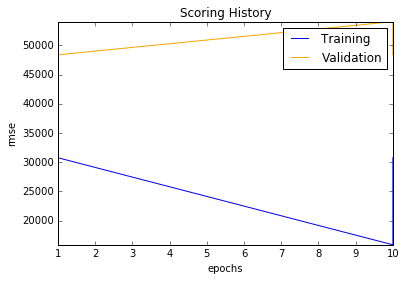

In [12]:
my_dl.plot()

## Predict with test data

In [14]:
hdf_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
def get_submission_df(model, data):
    df_submission = pd.DataFrame()
    prediction = model.predict(data)['predict']

    df_submission['Id'] = lst_id
    df_submission['SalePrice'] = prediction.as_data_frame()
    
    return df_submission


In [17]:
df_submission = get_submission_df(my_dl, hdf_test)

# my_glm.predict(hdf_test)
# h2o.shutdown()

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [19]:
df_submission.to_csv("F:/House Pricing/data/submission.csv", index=False)